# HW5 - Regex, Python, Classifiers

There are three problems in this assignment.

1. Text file processing with Python and regex
1. Basic EDA with pandas and matplotlib
1. Building classifier models with R and/or Python

The first two problems use data on YouTube statistics related to top trending videos. The third uses different data.


### Deliverables

* For Problem 1 you'll end up with one Python script file (.py). If you insist, you could write your function in this notebook but I recommend using PyCharm. You'll also end up with an output csv file that you'll turn in.
* This notebook containing your work for the Problems 2. Make sure that you've run all of your cells but that you've also organized your files so that if I have to rerun something, it will all work.
* Whatever files you create for Problem 3.

Please organize your deliverables within a folder in some coherent way. Include a README.md file to tell me where to find your work and how to test it (mostly for Problem 3).

## Problem 1 - Text file processing with Python

See https://www.kaggle.com/datasnaek/youtube-new for a description of this dataset. I've
provided the file `USvideos.csv` in the `data` folder.

Now you are going to write a short Python script to read the
`USvideos.csv` file and do some basic text file manipulation.

I'm giving you some skeleton code that you are free to use if you wish. The
skeleton code file is called `process_youtube_stats_skeleton.py`. **I highly
encourage you to use it as it lays out the steps needed and has many useful
code snippets and comments.**

You should also review the process_apache_log.py file that
we first saw in the Downloads for the regex session - I've included that as well. You can use
these files as a starting point for ideas or even just edit and add/delete code
as needed to accomplish this last task. Your new Python file should be named:

    process_youtube_stats_yourname.py # Obviously replacing "yourname" appropriately

Your job is to modify the skeleton file (or create a new program
from scratch) to accomplish the following. 

### The big picture
The big picture is that you are going to read the file,
use regex to find lines having a certain category_id value and some values on 
that line, update some counters, and write out the lines of interest to a new file.

I highly recommend you check out the Kaggle site for this dataset and snoop the data
yourself with a text editor.

**You must use regex for any text pattern matching.**

### The more detailed picture

Here are the detailed requirements:

* Your function `def` should look like the following (see the skeleton code):

      `def process_youtube(fn_youtube , fn_out):`

Your function will take an input filename and an output filename as arguments.

* You need to loop over the lines in the input file and use regex to determine if each
line has a value of 28 for the category_id field. Yes, you can hard code the 
28 into your regex pattern. Category_id 28 is Science & Technology.

For those lines that ARE from category 28:

* Increment a counter representing the number of lines matched.
* Using the captured trending_date as a dictionary key, update the dictionary
of counts by trending_date
* Store the line in a master list so that we can write out these lines at the end.

For those lines that ARE NOT from category 28:

* Increment a counter representing the number of lines NOT matched.

After all lines processed,
write out a message with the totals. Here's the last few lines of my output.

    18.01.01:	   10 videos
    18.26.02:	    9 videos
    18.05.02:	   14 videos
    18.08.01:	   11 videos
    17.22.12:	    8 videos

    Num lines matched --> 1233
    Num lines not matched --> 26089
 
    
Remember that dictionaries are not sorted and so you're output of the counts by date
may differ in the order printed out from mine.

Finally, write out the matched lines that you stored in a list.
There are several ways to write out a list of strings to a file. Google and
StackOverflow are your friend.

Again, see the skeleton code.


**HACKER EXTRA:** 

To make this program even better, change the function so that you can pass in
any category_id to use as the filter instead of having 28 hard coded in as it is now.

## Problem 2 - EDA with pandas and plotting libraries



In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import re
import csv

### Step 1 - Read in the data
Looks like there are two datetime related fields. Let's see if pandas can parse them
correctly.

In [3]:
# Read the data
USvideos = pd.read_csv('data/USvideos_no_desc.csv', parse_dates=['trending_date', 'publish_time'])

In [4]:
# Check out the structure of the resulting DataFrame
USvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23362 entries, 0 to 23361
Data columns (total 15 columns):
video_id                  23362 non-null object
trending_date             23362 non-null object
title                     23362 non-null object
channel_title             23362 non-null object
category_id               23362 non-null int64
publish_time              23362 non-null datetime64[ns]
tags                      23362 non-null object
views                     23362 non-null int64
likes                     23362 non-null int64
dislikes                  23362 non-null int64
comment_count             23362 non-null int64
thumbnail_link            23362 non-null object
comments_disabled         23362 non-null bool
ratings_disabled          23362 non-null bool
video_error_or_removed    23362 non-null bool
dtypes: bool(3), datetime64[ns](1), int64(5), object(6)
memory usage: 1.7+ MB


**Question 2.1** Which of the date fields gets read in correctly as some sort of date or datetime field?
>Only publish_time got read in correctly as a datetime field. The field trending_date got read in as an object, even when using the parse_dates function.

**Question 2.2** List the first 10 rows, rows 1500 through 1510, and the last 10 rows of the data frame. Use three separate code cells.

In [5]:
USvideos.head(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,last week tonight trump presidency|'last week ...,2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,racist superman|'rudy'|'mancuso'|'king'|'bach'...,3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,rhett and link|'gmm'|'good mythical morning'|'...,343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,ryan|'higa'|'higatv'|'nigahiga'|'i dare you'|'...,2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13 19:07:23,ijustine|'week with iPhone X'|'iphone x'|'appl...,119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12 05:37:17,SNL|'Saturday Night Live'|'SNL Season 43'|'Epi...,2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12 21:50:37,5 Ice Cream Gadgets|'Ice Cream'|'Cream Sandwic...,817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13 14:00:23,Trailer|'Hugh Jackman'|'Michelle Williams'|'Za...,826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13 13:45:16,vox.com|'vox'|'explain'|'shift change'|'future...,256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False


In [6]:
USvideos[1499:1510]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
1499,GIn4CeZq7Nw,17.21.11,Justice League: The B Team,Funny Or Die,23,2017-11-17 15:00:03,funnyordie|'funny or die'|'funny'|'comedy'|'sk...,83832,1185,123,137,https://i.ytimg.com/vi/GIn4CeZq7Nw/default.jpg,False,False,False
1500,3jtjkXSvuJw,17.21.11,Try Not to Laugh at This Silly Kitten,Kitten Lady,15,2017-11-17 22:40:58,fizz|'funniest'|'silliest'|'silly'|'funny'|'to...,71637,6306,16,626,https://i.ytimg.com/vi/3jtjkXSvuJw/default.jpg,False,False,False
1501,qS6LoRYUdhw,17.21.11,What Is The Most Dangerous Drug In The World? ...,AsapSCIENCE,28,2017-11-16 17:38:54,Most dangerous drug|'Most lethal drug'|'Is alc...,1137271,44392,682,3949,https://i.ytimg.com/vi/qS6LoRYUdhw/default.jpg,False,False,False
1502,kz3MEd1Jr0Q,17.21.11,Steve Aoki x Lauren Jauregui - All Night (Lyri...,Ultra Music,10,2017-11-17 15:01:54,ultra records|'ultra music'|'ultrarecords'|'ul...,1000754,63603,810,2884,https://i.ytimg.com/vi/kz3MEd1Jr0Q/default.jpg,False,False,False
1503,wJh-jurxmGQ,17.21.11,Will Ferrell Left Speechless as Mark Wahlberg ...,Good Morning Britain,24,2017-11-17 11:22:12,good morning britain|'breakfast show'|'news'|'...,80663,443,56,0,https://i.ytimg.com/vi/wJh-jurxmGQ/default.jpg,True,False,False
1504,8-u5nd2GqNE,17.21.11,The Secret Protocol for When the Queen Dies,Half as Interesting,27,2017-11-16 15:30:00,the|'secret'|'protocal'|'procedure'|'process'|...,1021443,25927,805,4476,https://i.ytimg.com/vi/8-u5nd2GqNE/default.jpg,False,False,False
1505,TsYGNNPQ3ZU,17.21.11,KEEP ME COMING by SUPERFRUIT,SUPERFRUIT,24,2017-11-17 17:01:09,superfruit|'super'|'fruit'|'scott'|'hoying'|'m...,165353,15688,172,1554,https://i.ytimg.com/vi/TsYGNNPQ3ZU/default.jpg,False,False,False
1506,fQvGSkTYJSE,17.21.11,Elon Musk Gives First Look At Tesla's Electric...,Tech Insider,2,2017-11-17 14:36:39,Tech Insider|'TI'|'Tech'|'Science'|'Innovation...,789872,8909,633,2917,https://i.ytimg.com/vi/fQvGSkTYJSE/default.jpg,False,False,False
1507,FKA-Jy6nuE0,17.21.11,"Tim McGraw, Faith Hill - Cowboy Lullaby (Audio)",TimandFaithVEVO,10,2017-11-17 08:00:01,the rest of our life|'soul to soul'|'soul 2 so...,65746,1570,72,49,https://i.ytimg.com/vi/FKA-Jy6nuE0/default.jpg,False,False,False
1508,JLOFZoBJnd8,17.21.11,TRANSFORMING SUMMER MCKEEN INTO ME!!,Maddie Ziegler,24,2017-11-18 01:40:29,maddie|'ziegler'|'summer'|'mckeen'|'dancer'|'c...,442977,25056,255,1160,https://i.ytimg.com/vi/JLOFZoBJnd8/default.jpg,False,False,False


In [7]:
USvideos.tail(10)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed
23352,4vl8-5udtII,18.12.03,Voice Activated Hot Dog Blaster,William Osman,28,2018-02-27 14:00:00,laser cutter|'william osman'|'crappy science'|...,300425,17789,165,2461,https://i.ytimg.com/vi/4vl8-5udtII/default.jpg,False,False,False
23353,H0g4JxKp4fc,18.12.03,*cough*,jacksfilms,23,2018-02-26 19:00:02,Jacksfilms|'Jack Douglass'|'YGS'|'YGS 100'|'YG...,2292736,224986,8689,41467,https://i.ytimg.com/vi/H0g4JxKp4fc/default.jpg,False,False,False
23354,hB07EJhMBRs,18.12.03,A Dad Didn't Brush His Teeth For 40 Days. This...,Chubbyemu,28,2018-02-26 20:00:02,medicine|'medical'|'education'|'science'|'tech...,564757,25726,1014,5280,https://i.ytimg.com/vi/hB07EJhMBRs/default.jpg,False,False,False
23355,i04pYZGDHIc,18.12.03,How To Make a CHINESE FRIED RICE TAKEOUT CAKE ...,How To Cake It,26,2018-02-27 16:00:18,Google|'YouTube'|'Yolanda Gampp'|'Yolanda Gamp...,867000,27419,373,2808,https://i.ytimg.com/vi/i04pYZGDHIc/default.jpg,False,False,False
23356,73_OWzBr8Fo,18.12.03,Made in Miami (Artist Spotlight Story) - Camil...,Camila Cabello,10,2018-02-27 16:00:06,camila cabello|'camila'|'youtube music'|'docum...,1432969,140312,1523,10472,https://i.ytimg.com/vi/73_OWzBr8Fo/default.jpg,False,False,False
23357,pH7VfJDq7f4,18.12.03,Why Bridges Move...,Practical Engineering,27,2018-02-27 12:00:08,thermal expansion|'expansion joint'|'thermal m...,456470,14826,279,820,https://i.ytimg.com/vi/pH7VfJDq7f4/default.jpg,False,False,False
23358,hV-yHbbrKRA,18.12.03,Macaroni - A Recipe From 1784,Townsends,27,2018-02-26 21:23:39,townsends|'jas townsend and son'|'reenacting'|...,519220,13600,329,1350,https://i.ytimg.com/vi/hV-yHbbrKRA/default.jpg,False,False,False
23359,CwKp6Xhy3_4,18.12.03,Chris Young - Hangin' On,ChrisYoungVEVO,10,2018-02-26 08:00:02,Losing sleep video|'losing sleep album'|'think...,1117570,7504,584,324,https://i.ytimg.com/vi/CwKp6Xhy3_4/default.jpg,False,False,False
23360,vQiiNGllGQo,18.12.03,Elderly man making sure his dog won't get wet,"Rock me, Joey Santiago.",15,2018-02-26 11:09:32,dog|'cute'|'adorable'|'doggo'|'doge'|'old'|'ma...,713574,12448,146,1474,https://i.ytimg.com/vi/vQiiNGllGQo/default.jpg,False,False,False
23361,2afSbqlp5HU,18.12.03,How to speak like Black Panther - BBC News,BBC News,1,2018-02-27 12:26:49,bbc|'bbc news'|'news'|'black panther'|'black p...,422979,7408,1344,1548,https://i.ytimg.com/vi/2afSbqlp5HU/default.jpg,False,False,False


### Step 2 - Data cleaning and prep


**Question 2.3**

Convert the `trending_date` field to an actual datetime data type using the `to_datetime()` function. Show that it worked with the `.info()` method for data frames. Then compute the difference between `publish_time` and `trending_date` in hours. Store it in a new field called `time_to_trend`.

In [8]:
USvideos['trending_date'] = pd.to_datetime(USvideos['trending_date'],format='%y.%d.%m')
USvideos['time_to_trend'] = time_to_trend = (USvideos.trending_date - USvideos.publish_time).astype('timedelta64[h]')
USvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23362 entries, 0 to 23361
Data columns (total 16 columns):
video_id                  23362 non-null object
trending_date             23362 non-null datetime64[ns]
title                     23362 non-null object
channel_title             23362 non-null object
category_id               23362 non-null int64
publish_time              23362 non-null datetime64[ns]
tags                      23362 non-null object
views                     23362 non-null int64
likes                     23362 non-null int64
dislikes                  23362 non-null int64
comment_count             23362 non-null int64
thumbnail_link            23362 non-null object
comments_disabled         23362 non-null bool
ratings_disabled          23362 non-null bool
video_error_or_removed    23362 non-null bool
time_to_trend             23362 non-null float64
dtypes: bool(3), datetime64[ns](2), float64(1), int64(5), object(5)
memory usage: 1.9+ MB


**Question 2.4**

Create new field called the `like_ratio` that is the number of likes divided by the sum of the number of likes and dislikes. Then use then use the `describe()` method to get a quick statistical summary of this new field. Then create two more new fields:

* `comment_intensity` as the ratio of comment_count and views
* `thumbs` as the sum of likes and dislikes

In [9]:
USvideos['like_ratio'] = USvideos['likes'] / (USvideos['likes'] + USvideos['dislikes'])
USvideos['comment_intensity'] = USvideos['comment_count'] / USvideos['views']
USvideos['thumbs'] = USvideos['likes'] + USvideos['dislikes']

USvideos[['like_ratio']].describe()

,like_ratio
count,23216.000000
mean,0.922306
std,0.121010
min,0.000000
25%,0.921359
50%,0.965594
75%,0.983484
max,1.000000


### Step 3 - Exploratory analysis with pandas

Note: Ignore the fact that some videos appear more than once because they trended multiple times on different dates.

**Question 2.5**

How many videos by channel title? Even better, sort in descending order. Here's what I get for the first few results:

    channel_title
    ESPN                                      114
    Vox                                       113
    Netflix                                   112
    NBA                                       112
    First We Feast                            111
    The Tonight Show Starring Jimmy Fallon    109



In [10]:
USvideos.groupby('channel_title').size().sort_values(ascending = False)

channel_title
ESPN                                      114
Vox                                       113
Netflix                                   112
NBA                                       112
First We Feast                            111
The Tonight Show Starring Jimmy Fallon    109
NFL                                       108
Tom Scott                                 106
TheEllenShow                              104
The Late Show with Stephen Colbert        103
WWE                                       101
Life Noggin                                99
INSIDER                                    98
CNN                                        98
Jimmy Kimmel Live                          97
Late Night with Seth Meyers                97
Screen Junkies                             96
Refinery29                                 91
Saturday Night Live                        88
ABC News                                   87
Great Big Story                            86
Marques Brownlee    

**Question 2.6**

Which channels are in the top 10 and bottom 10 for the mean of the `like_ratio` field we created above. Only consider channels with at least 5 videos in the USvideos DataFrame.

Obviously you will end up with several Python statements. 

In [11]:
filtered_df = USvideos[['channel_title', 'like_ratio']].groupby('channel_title').filter(lambda x: len(x['channel_title']) > 4)
filtered_df = filtered_df.groupby('channel_title').mean().sort_values(by = 'like_ratio', ascending = False)

print('Here are the top 10 channels by mean like ratio:\n')
print(filtered_df.head(10), '\n')
print('Here are the bottom 10 channels by mean like_ratio:\n')
print(filtered_df.tail(10))

Here are the top 10 channels by mean like ratio:

               like_ratio
channel_title            
Josh Levine      1.000000
John Sellars     1.000000
vnbreyes         1.000000
VOsprey22        1.000000
World Eyes       1.000000
Smyang Piano     0.999323
Amber Liu        0.998611
Kingsley         0.997568
BANGTANTV        0.997358
TheVampsVEVO     0.997348 

Here are the bottom 10 channels by mean like_ratio:

                      like_ratio
channel_title                   
Alpha Entertainment          NaN
Dancing On Ice               NaN
Kylie Jenner                 NaN
Pac-12 Networks              NaN
Paris Hilton                 NaN
Slooh                        NaN
Snapchat                     NaN
TV One                       NaN
cheeseandjamsandwich         NaN
hudsonunionsociety           NaN


In [12]:
#Groups by channel and gets index for channels with at least 5 videos
index = (USvideos.groupby('channel_title').size() > 4)

#Creates pivot table based on mean like_ratio
USvideos_pivot = USvideos.pivot_table(values='like_ratio',index='channel_title',aggfunc='mean',fill_value=0)

#Finds top 10 and bottom 10 channels by like_ratio
top_10 = USvideos_pivot[index].sort_values('like_ratio', ascending = False).head(10)
bottom_10 = USvideos_pivot[index].sort_values('like_ratio', ascending = False).tail(10)
print('Here are the top 10 channels by mean like ratio:\n')
print(top_10, '\n')
print('Here are the bottom 10 channels by mean like_ratio:\n')
print(bottom_10)

Here are the top 10 channels by mean like ratio:

               like_ratio
channel_title            
VOsprey22        1.000000
vnbreyes         1.000000
World Eyes       1.000000
Josh Levine      1.000000
John Sellars     1.000000
Smyang Piano     0.999323
Amber Liu        0.998611
Kingsley         0.997568
BANGTANTV        0.997358
TheVampsVEVO     0.997348 

Here are the bottom 10 channels by mean like_ratio:

                      like_ratio
channel_title                   
Slooh                        0.0
hudsonunionsociety           0.0
Paris Hilton                 0.0
TV One                       0.0
Snapchat                     0.0
cheeseandjamsandwich         0.0
Dancing On Ice               0.0
Kylie Jenner                 0.0
Alpha Entertainment          0.0
Pac-12 Networks              0.0


**Question 2.7**

You'll notice that `category_id` is an integer. Not very informative. Thankfully, the Kaggle site included json files which map category id to a category name. Well, kind of. If you look at the json file in the data folder, you'll see that it's got some other stuff in there. However, if you explore some of the kernels in Kaggle, you might run across the following bit of code which creates a simple dictionary with the `category_id` as the key and a category name as the value. Here's the code. Your job is to figure out how it works and put a comment before each line explaining what it does.

In [13]:
# creates a dictionary that maps `category_id` to `category`
import json

#Initialize empty dictionary
id_to_category = {}

#Reads JSON file
with open('./data/US_category_id.json', 'r') as f:
    data = json.load(f)
    #Loops over JSON file and adds the title to each corresponding category_id
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

#The key of the dictionary is the category_id, the value is the title
print(id_to_category)

{'1': 'Film & Animation', '2': 'Autos & Vehicles', '10': 'Music', '15': 'Pets & Animals', '17': 'Sports', '18': 'Short Movies', '19': 'Travel & Events', '20': 'Gaming', '21': 'Videoblogging', '22': 'People & Blogs', '23': 'Comedy', '24': 'Entertainment', '25': 'News & Politics', '26': 'Howto & Style', '27': 'Education', '28': 'Science & Technology', '29': 'Nonprofits & Activism', '30': 'Movies', '31': 'Anime/Animation', '32': 'Action/Adventure', '33': 'Classics', '34': 'Comedy', '35': 'Documentary', '36': 'Drama', '37': 'Family', '38': 'Foreign', '39': 'Horror', '40': 'Sci-Fi/Fantasy', '41': 'Thriller', '42': 'Shorts', '43': 'Shows', '44': 'Trailers'}


**Question 2.8**
Now figure out how you can use the `id_to_category` dictionary to create a new field in `USvideos` DataFrame called `category_name` containing, of course, the category name. 

In [14]:
USvideos['category_id'] = USvideos['category_id'].astype(str)
USvideos['category_name'] = USvideos.category_id.map(id_to_category)

**Question 2.9**
Then, use the `describe()` method along with `group_by` (and maybe `unstack()`) to compute summary statistics of the `views` field, grouping by `category_name`.

In [15]:
USvideos[['category_name', 'views']].groupby('category_name').describe()

views                                                  \
                        count          mean           std      min        25%   
category_name                                                                   
Autos & Vehicles        340.0  1.412712e+06  3.577258e+06   2860.0   90535.75   
Comedy                 1978.0  1.162698e+06  1.480560e+06   1807.0  183117.75   
Education              1002.0  4.889018e+05  5.199020e+05    773.0  193076.00   
Entertainment          5379.0  1.354847e+06  5.632033e+06    798.0  113187.50   
Film & Animation       1324.0  2.049144e+06  4.041941e+06    943.0   89534.50   
Gaming                  305.0  1.025884e+06  1.526447e+06   1237.0  131055.00   
Howto & Style          2241.0  6.562508e+05  1.969530e+06   1107.0  114523.00   
Music                  3366.0  2.555946e+06  6.126164e+06   1591.0  179866.25   
News & Politics        1907.0  3.327692e+05  5.895683e+05    549.0   32435.50   
Nonprofits & Activism    48.0  3.462797e+06  7.679870e+06   1456.0    8449.25   
People & Blogs         1886.0  1.075469e+06  3.692628e+06    884.0  126184.50   
Pets & Animals          593.0  5.538671e+05  8.100717e+05   3393.0   99681.00   
Science & Technology   1477.0  9.361251e+05  2.051200e+06    983.0  135427.00   
Shows                    16.0  1.274492e+05  5.229741e+04  36609.0   71026.25   
Sports                 1238.0  1.310862e+06  3.255911e+06    658.0   88869.25   
Travel & Events         262.0  8.613965e+05  2.355349e+06    789.0  114057.75   

                                                          
                            50%         75%          max  
category_name                                             
Autos & Vehicles       356956.0  1057622.50   25244097.0  
Comedy                 614006.0  1583905.25   17758014.0  
Education              340437.0   572224.50    3675806.0  
Entertainment          373328.0  1066109.50  149376127.0  
Film & Animation       709876.0  2120290.75   36152111.0  
Gaming                 529512.0  1392641.00   10256746.0  
Howto & Style          295725.0   726343.00   54155921.0  
Music                  583419.5  2055056.25  102012605.0  
News & Politics        141605.0   420946.50    5755949.0  
Nonprofits & Activism   33214.5   296106.00   24286474.0  
People & Blogs         278930.5   895435.00   56111957.0  
Pets & Animals         296542.0   634596.00    6187457.0  
Science & Technology   343273.0   930513.00   20658640.0  
Shows                  149911.0   171546.25     179723.0  
Sports                 283570.5  1009864.00   29090799.0  
Travel & Events        355839.5   843136.75   23932421.0

### Step 4 - Basic plotting in Python

Feel free to use either matplotlib, pandas or Seaborn (or any combination of) to create the following basic plots.

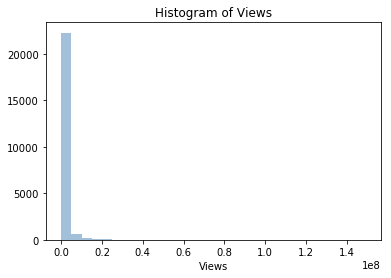

In [16]:
# Create a histogram of number of views
%matplotlib inline
plt.hist(USvideos.views,bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')
plt.xlabel('Views')
plt.title('Histogram of Views')
plt.show()

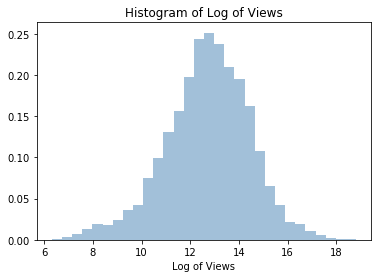

In [17]:
# Create a histogram of the log of number of views
log = np.log(USvideos.views)
plt.hist(log,bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')
plt.xlabel('Log of Views')
plt.title('Histogram of Log of Views')
plt.show()

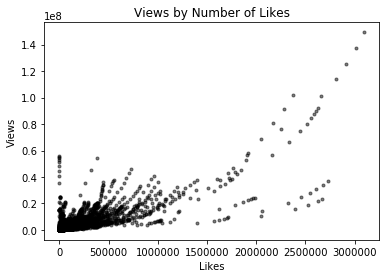

In [38]:
# Create a scatter plot of likes vs views
plt.scatter(USvideos.likes, USvideos.views, marker='.', 
         color='black', alpha = 0.5)
plt.title('Views by Number of Likes')
plt.xlabel('Likes')
plt.ylabel('Views')
plt.show()

In [19]:
# Create a set of boxplots of like_ratio by category


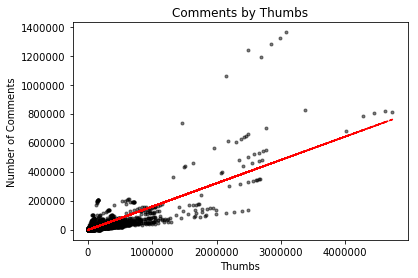

y=0.160853x+(-1898.721620)


In [37]:
# HACKER EXTRA - experiment with additional plots that help us understand this dataset
plt.scatter(USvideos.thumbs, USvideos.comment_count, marker='.', 
         color='black', alpha = 0.5)
plt.title('Comments by Thumbs')
plt.xlabel('Thumbs')
plt.ylabel('Number of Comments')

#Trendline
z = np.polyfit(USvideos.thumbs, USvideos.comment_count, 1)
p = np.poly1d(z)
plt.plot(USvideos.thumbs,p(USvideos.thumbs),"r--")

plt.show()

#The line equation
print ('y=%.6fx+(%.6f)'%(z[0],z[1]))

>It appears that there is a trend indicating the higher the thumbs (number of likes and dislikes), the more comments are on the post. This intuitively makes sense because if someone felt strongly enough about a video to either like or dislike it, they are likely going to comment why.

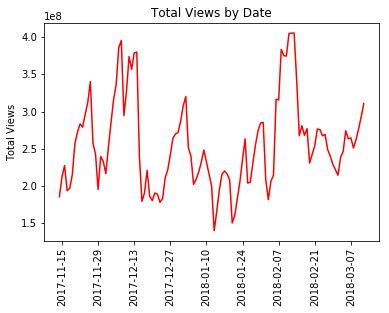

In [79]:
#Create new data frame based on pivot table
date_df = pd.DataFrame(USvideos.pivot_table(values='views',index='trending_date',aggfunc='sum',fill_value=0).to_records())

#Plot values
plt.plot_date(date_df.trending_date, date_df.views, fmt='r-')
plt.title('Total Views by Date')
plt.ylabel('Total Views')
plt.xticks(rotation = 90)
plt.show()

>This is total viewship by date from mid-November 2017 to early March 2018. There does not appear to be a discernable pattern. Total viewship of trending videos appears to be highly volatile, almost like a time series plot of a stock. This make sense because the posting of trending videos and popularity of them is random.

## Problem 3 - Classification

See Rmd file.

